In [1]:
train_dir = '/Users/somyapadhy/Desktop/CNN prac/GuavaDiseaseDataset/train'
test_dir = '/Users/somyapadhy/Desktop/CNN prac/GuavaDiseaseDataset/test'
val_dir = '/Users/somyapadhy/Desktop/CNN prac/GuavaDiseaseDataset/val'

In [2]:
import tensorflow as tf
from tensorflow.python.keras.layers import Input, Dense

In [3]:
seed = 42

In [4]:
train = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='categorical',
    class_names=['Anthracnose', 'fruit_fly', 'healthy_guava'],
    batch_size=16,
    image_size=(256, 256),
    shuffle=True,
    seed=seed,
    validation_split=0,
    crop_to_aspect_ratio=True
)

Found 2647 files belonging to 3 classes.


In [5]:
test = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='categorical',
    class_names=['Anthracnose', 'fruit_fly', 'healthy_guava'],
    batch_size = 16,
    image_size = (256,256),
    shuffle = True,
    seed = seed,
    validation_split = 0,
    crop_to_aspect_ratio = True
)

Found 382 files belonging to 3 classes.


In [6]:
validation = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    labels='inferred',
    label_mode='categorical',
    class_names =['Anthracnose', 'fruit_fly', 'healthy_guava'],
    batch_size = 16,
    image_size = (256,256),
    shuffle = True,
    seed = seed,
    validation_split = 0,
    crop_to_aspect_ratio = True
)

Found 755 files belonging to 3 classes.


In [7]:
from tensorflow.keras.layers import Rescaling

In [8]:
scaler = Rescaling(1./255)
train = train.map(lambda x, y: (scaler(x), y)) 
test = test.map(lambda x, y: (scaler(x), y))
validation = validation.map(lambda x, y: (scaler(x), y))

In [9]:
augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomRotation(
            factor= (-.25 , .3),
            fill_mode = 'reflect',
            interpolation = 'bilinear',
            seed = seed
        ),

        tf.keras.layers.RandomBrightness(
            factor=(-.45,.45),
            value_range= (0.0,1.0),
            seed = seed
        ),
        
        tf.keras.layers.RandomContrast(
            factor =(.5),
            seed = seed
        )
    ]
)

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D,
    Activation,
    BatchNormalization,
    MaxPooling2D,
    Dropout,
    Flatten,
    Dense
)

strategy = tf.distribute.get_strategy()

with strategy.scope():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), strides=1, padding='same', input_shape=(256, 256, 3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (5, 5), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(Dropout(0.2))

    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(Dropout(0.3))

    model.add(Conv2D(256, (5, 5), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(Dropout(0.4))

    model.add(Conv2D(512, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(Dropout(0.4))

    model.add(Flatten())

    model.add(Dense(2048))
    model.add(Activation('relu'))
    model.add(Dropout(0.6))

    model.add(Dense(3, activation='softmax'))


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer= tf.keras.optimizers.RMSprop(0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [12]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [13]:
early_stopping = EarlyStopping(monitor = 'val_accuracy',
                              patience = 5, mode = 'max',
                              restore_best_weights = True)

checkpoint = ModelCheckpoint(
    'best_model.keras', 
    monitor='val_accuracy',
    save_best_only=True
)

In [14]:
history = model.fit(
    train,
    epochs=10,
    validation_data= validation
)

Epoch 1/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 154s 925ms/step - accuracy: 0.7147 - loss: 4.6928 - val_accuracy: 0.2450 - val_loss: 22.2739
Epoch 2/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 152s 917ms/step - accuracy: 0.8437 - loss: 1.5258 - val_accuracy: 0.2450 - val_loss: 42.7410
Epoch 3/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 153s 922ms/step - accuracy: 0.8903 - loss: 0.9724 - val_accuracy: 0.2464 - val_loss: 28.6745
Epoch 4/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 153s 920ms/step - accuracy: 0.9064 - loss: 0.7573 - val_accuracy: 0.4371 - val_loss: 12.9216
Epoch 5/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 154s 924ms/step - accuracy: 0.9324 - loss: 0.4667 - val_accuracy: 0.5404 - val_loss: 8.7862
Epoch 6/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 152s 916ms/step - accuracy: 0.9223 - loss: 0.4802 - val_accuracy: 0.5391 - val_loss: 8.0949
Epoch 7/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 152s 914ms/step - accuracy: 0.9532 - loss: 0.2385 - val_accuracy: 0.7589 - val_loss: 4.0140
Epoch 8/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 151s 910ms/step - accuracy: 0.94

In [15]:
import torch
print(torch.__version__)
print("MPS Backend Available:", torch.backends.mps.is_available())


2.5.1
MPS Backend Available: True


In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torchvision.models as models
import os

# Check for GPU availability (MPS backend for Metal)
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

# Directories
train_dir = '/Users/somyapadhy/Desktop/CNN prac/GuavaDiseaseDataset/train'
test_dir = '/Users/somyapadhy/Desktop/CNN prac/GuavaDiseaseDataset/test'
val_dir = '/Users/somyapadhy/Desktop/CNN prac/GuavaDiseaseDataset/val'

# Data Transformations (including Rescaling and Data Augmentation)
train_transforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomRotation(degrees=(-25, 30)),
    transforms.ColorJitter(brightness=0.45, contrast=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

val_test_transforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load Datasets
train_dataset = datasets.ImageFolder(train_dir, transform=train_transforms)
val_dataset = datasets.ImageFolder(val_dir, transform=val_test_transforms)
test_dataset = datasets.ImageFolder(test_dir, transform=val_test_transforms)

# Data Loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# CNN Model Definition
class CNNModel(nn.Module):
    def __init__(self, num_classes=3):
        super(CNNModel, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.2),

            nn.Conv2d(32, 64, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.3),

            nn.Conv2d(128, 256, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.4),

            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.4),

            nn.Flatten(),
            nn.Linear(512 * 8 * 8, 2048),
            nn.ReLU(),
            nn.Dropout(0.6),
            nn.Linear(2048, num_classes)
        )

    def forward(self, x):
        return self.model(x)

# Initialize Model
model = CNNModel(num_classes=3).to(device)

# Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model.parameters(), lr=0.0001)

# Early Stopping
patience = 5
best_val_acc = 0
patience_counter = 0

# Training Loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_train_loss:.4f}")

    # Validation loop
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_acc = correct / total
    print(f"Validation Accuracy: {val_acc:.4f}")

    # Early stopping logic
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), 'best_model.pth')
        patience_counter = 0
    else:
        patience_counter += 1

    if patience_counter >= patience:
        print("Early stopping triggered")
        break

print("Training Complete")

# Load the best model
model.load_state_dict(torch.load('best_model.pth'))


Using device: mps
Epoch [1/10], Loss: 3.2278
Validation Accuracy: 0.6106
Epoch [2/10], Loss: 1.1132
Validation Accuracy: 0.5430
Epoch [3/10], Loss: 0.6802
Validation Accuracy: 0.5073
Epoch [4/10], Loss: 0.6105
Validation Accuracy: 0.6424
Epoch [5/10], Loss: 0.4464
Validation Accuracy: 0.4278
Epoch [6/10], Loss: 0.4379
Validation Accuracy: 0.7285
Epoch [7/10], Loss: 0.3446
Validation Accuracy: 0.6808
Epoch [8/10], Loss: 0.3268
Validation Accuracy: 0.6053
Epoch [9/10], Loss: 0.3502
Validation Accuracy: 0.8371
Epoch [10/10], Loss: 0.2900
Validation Accuracy: 0.9510
Training Complete


/var/folders/nx/01qfr12s0cs_hkhsczdd3k880000gn/T/ipykernel_4754/3297232427.py:154: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model

<All keys matched successfully>

In [17]:
import matplotlib.pyplot as plt


In [18]:
# Lists to store metrics for visualization
train_losses = []
val_accuracies = []

# Training Loop
num_epochs = 100
patience = 5
best_val_acc = 0
patience_counter = 0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)  # Track training loss

    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_train_loss:.4f}")

    # Validation loop
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_acc = correct / total
    val_accuracies.append(val_acc)  # Track validation accuracy

    print(f"Validation Accuracy: {val_acc:.4f}")

    # Early stopping logic
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), 'best_model.pth')
        patience_counter = 0
    else:
        patience_counter += 1

    if patience_counter >= patience:
        print("Early stopping triggered")
        break

print("Training Complete")


Epoch [1/100], Loss: 0.2786
Validation Accuracy: 0.8795
Epoch [2/100], Loss: 0.2552
Validation Accuracy: 0.9576
Epoch [3/100], Loss: 0.2492
Validation Accuracy: 0.9682
Epoch [4/100], Loss: 0.1913
Validation Accuracy: 0.9589
Epoch [5/100], Loss: 0.2047
Validation Accuracy: 0.9709
Epoch [6/100], Loss: 0.1764
Validation Accuracy: 0.9152
Epoch [7/100], Loss: 0.1496
Validation Accuracy: 0.9881
Epoch [8/100], Loss: 0.1669
Validation Accuracy: 0.9748
Epoch [9/100], Loss: 0.1609
Validation Accuracy: 0.9775
Epoch [10/100], Loss: 0.1541
Validation Accuracy: 0.9788
Epoch [11/100], Loss: 0.1386
Validation Accuracy: 0.9854
Epoch [12/100], Loss: 0.1295
Validation Accuracy: 0.9788
Early stopping triggered
Training Complete


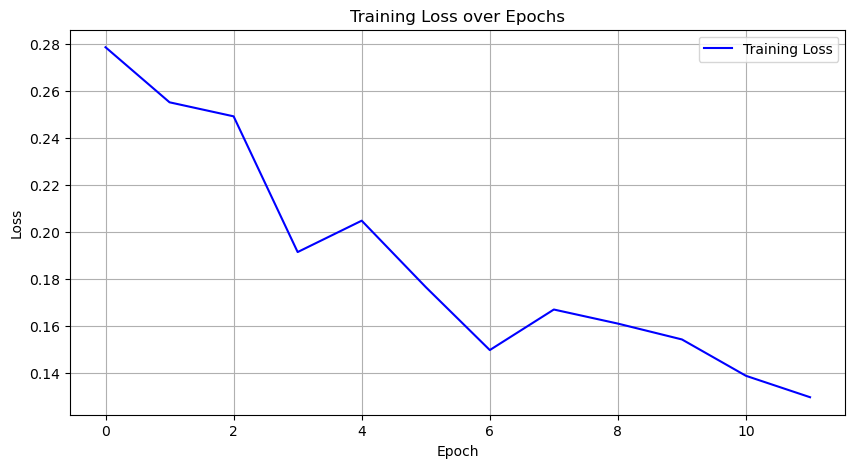

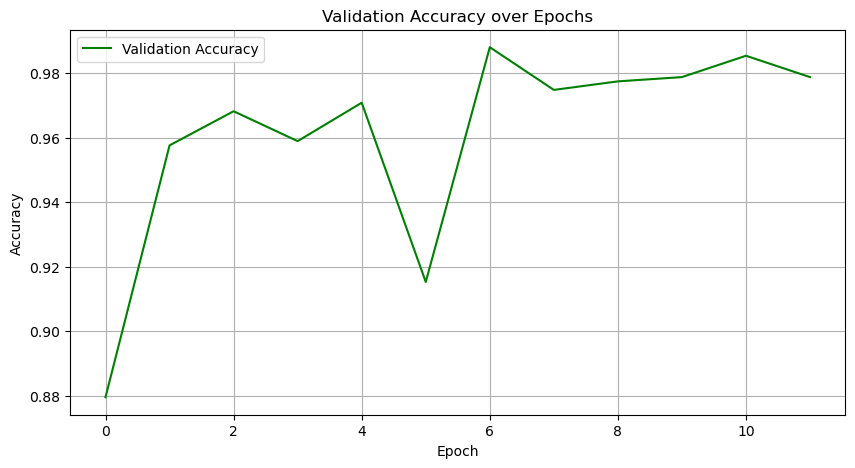

In [19]:
# Plot the training loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Plot the validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(val_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.legend()
plt.grid(True)
plt.show()
